In [1]:
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

def Euclidean(x,y):
    return np.sqrt((y[0]-x[0])**2 + (y[1] - x[1])**2)

In [57]:
# For webcam input:
from ast import ListComp

datadirectory = 'data'
PoseData = list()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(os.path.join('..', datadirectory, 'MariaDancingSequence.webm'))
i = 0
imageName = "MariaMovementSequence_xyz_28Sept"
# MaxRecordings = 10
pose = mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)  # as pose:

while cap.isOpened():
  
  i += 1
  
  success, image = cap.read()
  if not success:
    print("Ignoring empty camera frame.")
    # If loading a video, use 'break' instead of 'continue'.
    break

  # Draw the pose annotation on the image.
  image.flags.writeable = True
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  results = pose.process(image)
  mp_drawing.draw_landmarks(
      image,
      results.pose_landmarks,
      mp_pose.POSE_CONNECTIONS,
      landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
  
  newData = {coord + str(j):lm.__getattribute__(coord)  for j, lm in enumerate(results.pose_landmarks.landmark) for coord in ["x", "y", "z"]}
  PoseData.append(newData)

  # Flip the image horizontally for a selfie-view display.
  cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
  if (cv2.waitKey(5) & 0xFF == 27): ## or i>MaxRecording s :
    break
cap.release()
df = pd.DataFrame(PoseData)
df.to_csv(os.path.join("..","data", "csv", imageName + ".csv"))
cv2.destroyAllWindows()

Ignoring empty camera frame.


In [58]:
import cv2
images = []
cap = cv2.VideoCapture(os.path.join('..', 'data', 'MariaDancingSequence.webm'))
# for i in range(315):
fromFrame = 275
tillFrame = 315
lastSuccessfulFrame = 0
numberOfsuccessivUnsuccessesToBreak = 20
unsuccesses = 0
frame = 0
while unsuccesses < numberOfsuccessivUnsuccessesToBreak:
  success, image = cap.read()
  if success and (frame>=fromFrame and frame<=tillFrame):
    images.append(image)
  else:
    images.append('empty')

  if not success:
    unsuccesses += 1
  else:
    unsuccesses = 0
    lastSuccessfulFrame = frame

  frame += 1

cap.release()

durationOfClip = (2 * 60 + 42)
fps = int((lastSuccessfulFrame) / durationOfClip)

Load the data from the cvs storage

In [60]:
fileName = "MariaMovementSequence_xyz_27Sept"
df = pd.read_csv(
    os.path.join("..","data", "csv", fileName + ".csv"), 
    header=0,
    index_col=0)
df["time"] = df.index / fps

In [61]:
landmarks = [
        'nose',
        'left_eye_inner', 'left_eye', 'left_eye_outer',
        'right_eye_inner', 'right_eye', 'right_eye_outer',
        'left_ear', 'right_ear',
        'mouth_left', 'mouth_right',
        'left_shoulder', 'right_shoulder',
        'left_elbow', 'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]
index_from_landmark = {name: i for i,name in enumerate(landmarks)}

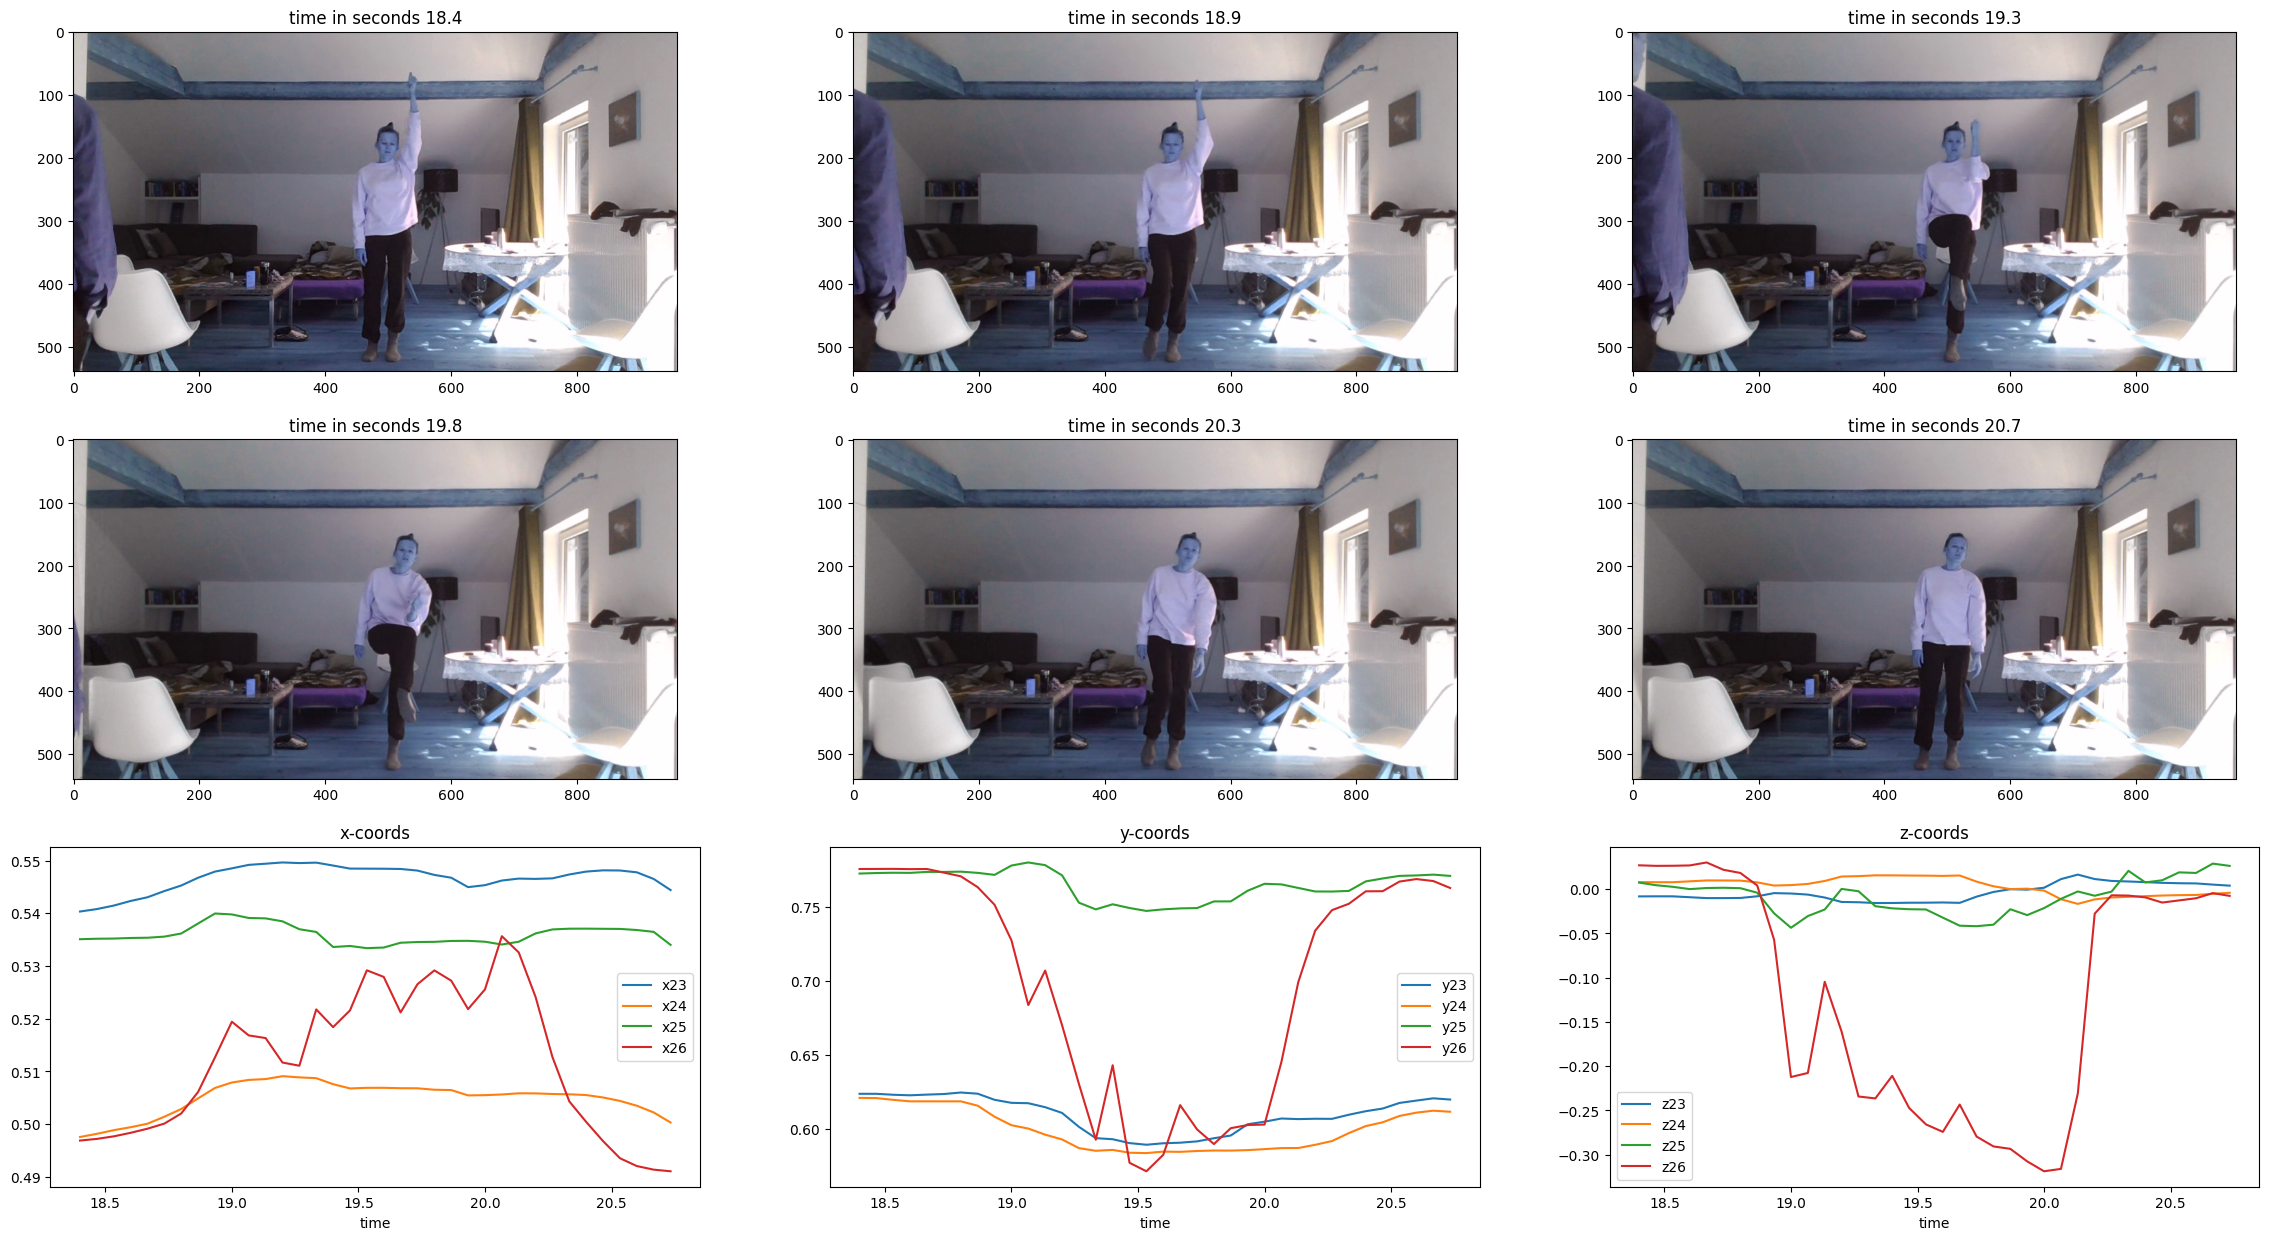

In [65]:
import matplotlib.pyplot as plt
startAt = 276
steps = 7
ncols = 3
fig, axes = plt.subplots(nrows=3, ncols=ncols)
# frame = startAt
for i in range(6):
    row = round(np.floor(i/ncols))
    col = i % ncols
    timeframe = (startAt + (i * steps))
    time = round(timeframe / fps, 1)
    axes[row,col].imshow(images[timeframe])
    axes[row,col].set_title('time in seconds {}'.format(time))
these = [index_from_landmark[i] for i in ['left_hip', 'right_hip', 'left_knee', 'right_knee']]
# print( [landmarks[i] for i in these])
df[(df.index>=startAt) & (df.index <= timeframe)].plot(x="time", y=['x' + str(i) for i in these], ax=axes[2,0])
axes[2,0].set_title('x-coords')
df[(df.index>=startAt) & (df.index <= timeframe)].plot(x="time", y=['y' + str(i) for i in these], ax=axes[2,1])
axes[2,1].set_title('y-coords')
df[(df.index>=startAt) & (df.index <= timeframe)].plot(x="time", y=['z' + str(i) for i in these], ax=axes[2,2])
axes[2,2].set_title('z-coords')
fig.set_size_inches(28.5, 15.0)
# fig.set_size_inches(18.5, 8.0)
plt.show()